<a href="https://colab.research.google.com/github/svetajamkina/PYTHON/blob/main/8_10.24_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Understandin the data

In [3]:
import pandas as pd


In [4]:
advertising=pd.read_csv('/content/tvmarketing.csv')
#Tv -advertising budget spent on TV marketing
# Sales -how much we have sold (revenue)

In [5]:
advertising.head()# firsy 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


##Regression plot

In [7]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

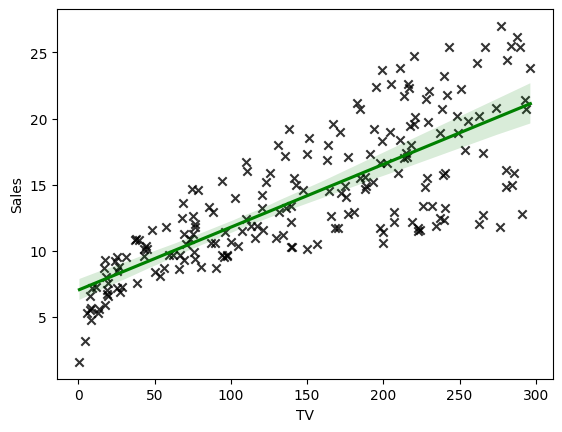

In [8]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [9]:
#Pearson correlation koefficient
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [10]:
advertising['TV'].corr(advertising['Sales']) # positive, strong

0.7822244248616061

In [11]:
###Supervised vs unsupervised


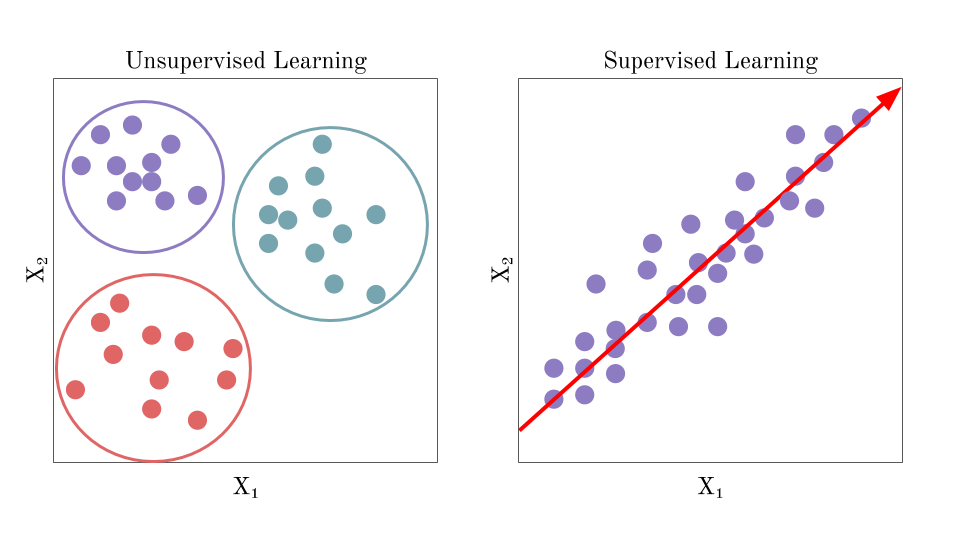

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [16]:
# Preparing X and Y
X= advertising.drop('Sales', axis=1) #independent variable
X.head()


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
Y=advertising.drop('TV', axis=1)
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


#Train/Tests set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)
X_train

,TV
7,120.2
24,62.3
176,248.4
32,97.2
170,50.0
...,...
148,38.0
30,292.9
1,44.5
175,276.9


##Train the model

In [21]:
from sklearn.linear_model import LinearRegression #Import the model

In [22]:
model = LinearRegression() #Initialize the model

In [23]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [26]:
### Y = mX + b
print(f'Model intercept is {model.intercept_}')
print(f'Model coefficient is {model.coef_}')

Model intercept is [7.08297557]
Model coefficient is [[0.04709731]]


##A prediction

In [24]:

my_new_budget = [[50]] #2D array dataset

my_predicted_sales = model.predict(my_new_budget)

print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 50, then predicted sales are 9.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
X_test.head()

,TV
120,141.3
22,13.2
87,110.7
71,109.8
45,175.1


In [28]:
y_pred = model.predict(X_test)


In [36]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual_sales,Predicted_sales
120,141.3,15.5,13.737826
22,13.2,5.6,7.704660
87,110.7,16.0,12.296648
71,109.8,12.4,12.254261
45,175.1,14.9,15.329715


In [33]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [34]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
120,141.3,15.5,13.737826,1.762174
22,13.2,5.6,7.704660,2.104660
87,110.7,16.0,12.296648,3.703352
71,109.8,12.4,12.254261,0.145739
45,175.1,14.9,15.329715,0.429715
